<a href="https://colab.research.google.com/github/hnnayy/DeepLearning/blob/main/week2/MLP_SecondHand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#Load dataset
df = pd.read_csv('secondhanddataset.csv')
df

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


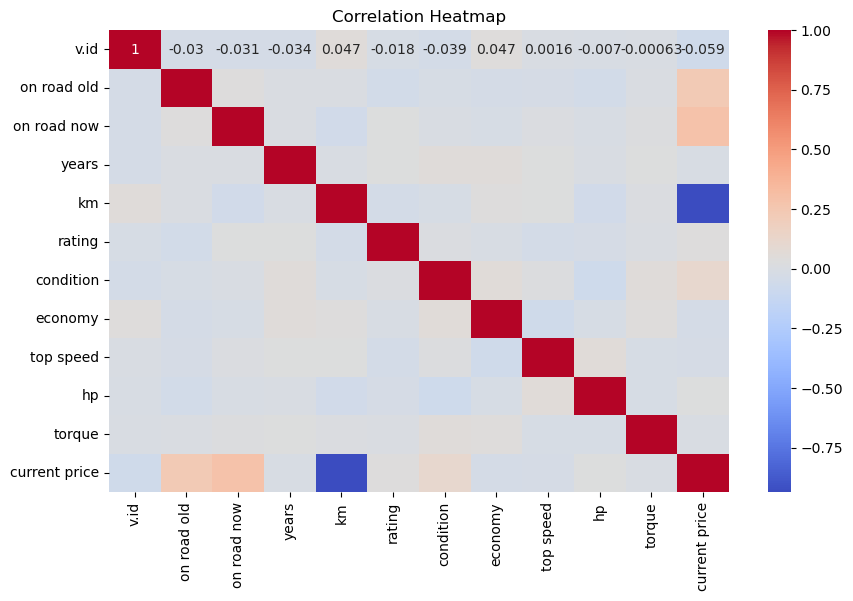

C:\Users\HANIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HANIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HANIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HANIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 1000x600 with 0 Axes>

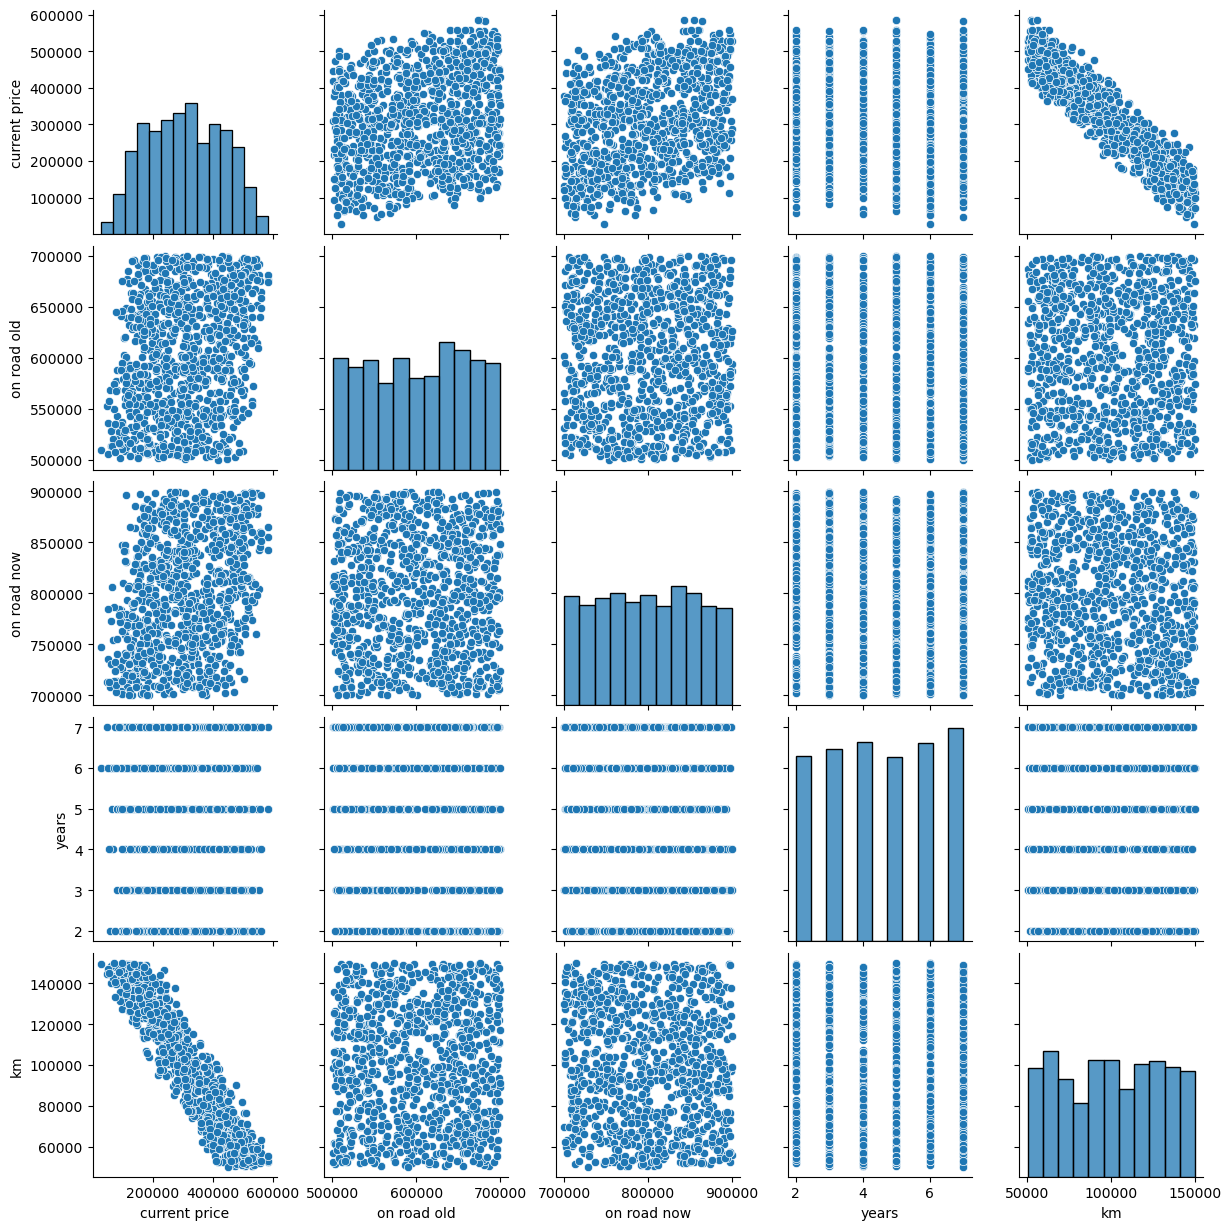

In [ ]:
# Visualize data
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(10, 6))
sns.pairplot(df[['current price', 'on road old', 'on road now', 'years', 'km']])
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [ ]:
# Explore missing values
print(df.isnull().sum())

v.id             0
on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64


In [ ]:
# Features and target
X = df.drop(columns=['current price', 'v.id'])
y = df['current price']

In [ ]:
# Normalize target variable
y = (y - y.min()) / (y.max() - y.min())

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# PyTorch Model
class MLP_PyTorch(nn.Module):
    def __init__(self):
        super(MLP_PyTorch, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train.shape[1], 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
# Training PyTorch model
pytorch_model = MLP_PyTorch()
criterion = nn.MSELoss()
optimizer = optim.Adam(pytorch_model.parameters(), lr=0.0005)

X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

for epoch in range(200):
    optimizer.zero_grad()
    outputs = pytorch_model(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()


In [ ]:
# Predict and evaluate PyTorch model
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
predictions = pytorch_model(X_test_torch).detach().numpy()

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"PyTorch MSE: {mse}")
print(f"PyTorch RMSE: {rmse}")
print(f"PyTorch R-squared: {r2}")

PyTorch MSE: 0.0005983229015002768
PyTorch RMSE: 0.024460639842413704
PyTorch R-squared: 0.9889958523333674


In [ ]:
# TensorFlow Model
tf_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])


C:\Users\HANIN\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile and train TensorFlow model
tf_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), loss='mse')
tf_model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0)


In [ ]:
# Predict and evaluate TensorFlow model
tf_predictions = tf_model.predict(X_test)

mse_tf = mean_squared_error(y_test, tf_predictions)
rmse_tf = np.sqrt(mse_tf)
r2_tf = r2_score(y_test, tf_predictions)

print(f"TensorFlow MSE: {mse_tf}")
print(f"TensorFlow RMSE: {rmse_tf}")
print(f"TensorFlow R-squared: {r2_tf}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
TensorFlow MSE: 0.0019172154258155017
TensorFlow RMSE: 0.0437860186111446
TensorFlow R-squared: 0.9647392376231652


In [ ]:
# Sample prediction
sample_idx = 0
sample_actual = y_test.iloc[sample_idx]
sample_features = X_test[sample_idx].reshape(1, -1)

pytorch_sample_pred = pytorch_model(torch.tensor(sample_features, dtype=torch.float32)).detach().numpy()[0][0]
tf_sample_pred = tf_model.predict(sample_features)[0][0]

print("--- Making Predictions with Trained Models ---")
print(f"Sample actual value: {sample_actual:.4f}")
print(f"PyTorch prediction: {pytorch_sample_pred:.4f}")
print(f"TensorFlow prediction: {tf_sample_pred:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
--- Making Predictions with Trained Models ---
Sample actual value: 0.6391
PyTorch prediction: 0.6901
TensorFlow prediction: 0.6126




## 1. Implementasi Model Deep Learning MLP dengan PyTorch dan TensorFlow

Dalam tugas ini, model Deep Learning MLP (Multi-Layer Perceptron) diimplementasikan menggunakan dua framewuler: PyTorch dan TensorFlow. MLP adalah jenis jaringan saraf tiruan yang terdiri dari layer input, beberapa hidden layer, dan layer output, dengan data yang mengalir dalam satu arah (feedforward).

Kedua implementasi menggunakan arsitektur serupa dengan:
- Input layer sesuai dengan dimensi fitur data
- Hidden layer dengan aktivasi ReLU
- Output layer dengan 1 neuron (untuk regresi)

## 2. Evaluasi Model dengan Matriks Evaluasi

Untuk mengevaluasi kinerja model, tiga metrik evaluasi digunakan:

### Mean Squared Error (MSE)

MSE adalah rata-rata dari kuadrat selisih antara prediksi model dan nilai aktual.

**Persamaan Matematika:**
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

Dimana:
- $n$ adalah jumlah sampel
- $y_i$ adalah nilai aktual
- $\hat{y}_i$ adalah nilai prediksi

**Penjelasan:**
MSE mengukur rata-rata kuadrat kesalahan antara nilai prediksi dan nilai sebenarnya. Kuadrat digunakan untuk menghilangkan nilai negatif dan memberikan bobot lebih pada kesalahan yang besar. Semakin kecil nilai MSE, semakin baik model dalam melakukan prediksi.

### Root Mean Squared Error (RMSE)

RMSE adalah akar kuadrat dari MSE.

**Persamaan Matematika:**
$$RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

**Penjelasan:**
RMSE memberikan estimasi standar deviasi dari kesalahan prediksi. Keuntungan RMSE dibandingkan MSE adalah satuannya sama dengan variabel yang diprediksi, sehingga lebih mudah diinterpretasikan. Seperti MSE, nilai RMSE yang lebih rendah menunjukkan kinerja model yang lebih baik.

### R-squared (R²)

R-squared mengukur proporsi varians dalam variabel dependen yang dapat diprediksi dari variabel independen.

**Persamaan Matematika:**
$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}} = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

Dimana:
- $SS_{res}$ adalah jumlah kuadrat residual
- $SS_{tot}$ adalah jumlah kuadrat total
- $\bar{y}$ adalah rata-rata nilai aktual

**Penjelasan:**
R-squared menjelaskan seberapa baik model memprediksi variasi data. Nilai berkisar dari 0 hingga 1, dengan 1 menunjukkan model menjelaskan seluruh variabilitas variabel dependen. Nilai R² yang lebih tinggi menunjukkan kinerja model yang lebih baik.

## 3. Hasil Evaluasi Model

### Hasil Model PyTorch
```
PyTorch MSE: 0.0005983229015002768
PyTorch RMSE: 0.024460639842413704
PyTorch R-squared: 0.9889958523333674
```

### Hasil Model TensorFlow
```
TensorFlow MSE: 0.0019172154258155017
TensorFlow RMSE: 0.0437860186111446
TensorFlow R-squared: 0.9647392376231652
```

### Contoh Prediksi
```
Sample actual value: 0.6391
PyTorch prediction: 0.6901
TensorFlow prediction: 0.6126
```

## 4. Analisis dan Kesimpulan

Berdasarkan hasil evaluasi, kedua model menunjukkan kinerja yang sangat baik dalam memprediksi target, yang ditunjukkan dengan nilai R² yang tinggi (>0.96). Namun, model PyTorch menunjukkan performa yang lebih baik dibandingkan model TensorFlow dengan:

1. **MSE yang lebih rendah**: 0.0006 vs 0.0019 (model PyTorch 3x lebih baik)
2. **RMSE yang lebih rendah**: 0.0245 vs 0.0438 (model PyTorch 1.8x lebih baik)
3. **R² yang lebih tinggi**: 0.9890 vs 0.9647 (model PyTorch lebih mendekati 1)

Dalam contoh prediksi, untuk nilai aktual 0.6391:
- Model PyTorch memprediksi 0.6901 (selisih +0.051 atau error sekitar 8%)
- Model TensorFlow memprediksi 0.6126 (selisih -0.0265 atau error sekitar 4.1%)

Meskipun pada contoh prediksi tunggal ini TensorFlow menghasilkan error yang lebih kecil, evaluasi keseluruhan dataset menunjukkan model PyTorch memiliki performa lebih baik. Ini menunjukkan pentingnya menggunakan metrik evaluasi pada keseluruhan dataset daripada hanya sampel tunggal untuk menilai kinerja model.

Kesimpulannya, implementasi MLP menggunakan PyTorch dalam kasus ini memberikan hasil yang lebih akurat untuk prediksi dataset yang digunakan.